##Importing Libraries

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

##Importing Datasets

In [2]:
from google.colab import files
uploaded = files.upload()

Saving datatest.txt to datatest.txt
Saving datatest2.txt to datatest2.txt
Saving datatraining.txt to datatraining.txt


Removed 'date' column from all 3 datasets

In [3]:
df1 = pd.read_csv("datatraining.txt")
df1 = df1.drop(['date'], axis = 1)                           # df1 is for training
df1.to_csv('datatraining.csv', index = None )                # storing this dataframe in a csv file
                   
df2 = pd.read_csv("datatest.txt")
df2 = df2.drop(['date'], axis = 1)                           # df2 is for testing
df2.to_csv('datatest.csv',  index = None)                    # storing this dataframe in a csv file

df3 = pd.read_csv("datatest2.txt")
df3 = df3.drop(['date'], axis = 1)                           # df3 is for testing
df3.to_csv('datatest2.csv',  index = None)                  # storing this dataframe in a csv file

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(8143, 6)
(2665, 6)
(9752, 6)


In [5]:
df2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,749.200000,0.004764,1
141,23.7180,26.290,578.400000,760.400000,0.004773,1
142,23.7300,26.230,572.666667,769.666667,0.004765,1
143,23.7225,26.125,493.750000,774.750000,0.004744,1
144,23.7540,26.200,488.600000,779.000000,0.004767,1


In [6]:
df1.isna().any().sum()

0

In [7]:
df2.isna().any().sum()

0

In [8]:
df3.isna().any().sum()

0

In [9]:
df1

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.250000,0.004793,1
2,23.15,27.2675,429.5,714.000000,0.004783,1
3,23.15,27.2450,426.0,713.500000,0.004779,1
4,23.15,27.2000,426.0,708.250000,0.004772,1
5,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...
8139,21.05,36.0975,433.0,787.250000,0.005579,1
8140,21.05,35.9950,433.0,789.500000,0.005563,1
8141,21.10,36.0950,433.0,798.500000,0.005596,1
8142,21.10,36.2600,433.0,820.333333,0.005621,1


In [10]:
#Changing index of df2 
df2.index = np.arange(1,len(df2)+1)
df2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.7000,26.272,585.200000,749.200000,0.004764,1
2,23.7180,26.290,578.400000,760.400000,0.004773,1
3,23.7300,26.230,572.666667,769.666667,0.004765,1
4,23.7225,26.125,493.750000,774.750000,0.004744,1
5,23.7540,26.200,488.600000,779.000000,0.004767,1


In [11]:
df1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [12]:
df2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [13]:
df3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [14]:
print(df1[df1.Light == 0])

      Temperature  Humidity  Light         CO2  HumidityRatio  Occupancy
17         23.000     27.20    0.0  681.500000       0.004728          0
18         22.945     27.29    0.0  685.000000       0.004728          0
19         22.945     27.39    0.0  685.000000       0.004745          0
20         22.890     27.39    0.0  689.000000       0.004730          0
21         22.890     27.39    0.0  689.500000       0.004730          0
...           ...       ...    ...         ...            ...        ...
8082       20.290     33.20    0.0  454.666667       0.004891          0
8083       20.290     33.20    0.0  451.000000       0.004891          0
8084       20.290     33.20    0.0  451.000000       0.004891          0
8085       20.290     33.20    0.0  455.000000       0.004891          0
8086       20.290     33.20    0.0  458.000000       0.004891          0

[5160 rows x 6 columns]


In [15]:
# There are lots of zero values in column "Light" in all 3 datasets
print(sum(df1.Light  ==  0))
print(sum(df2.Light  ==  0))
print(sum(df3.Light  ==  0))

5160
1615
5997


In [16]:
print(sum(df1[df1.Light  ==  0].Occupancy))
print(sum(df2[df2.Light  ==  0].Occupancy))
print(sum(df3[df3.Light  ==  0].Occupancy))

0
0
1


In [17]:
x = df1.Light
x

1       426.0
2       429.5
3       426.0
4       426.0
5       426.0
        ...  
8139    433.0
8140    433.0
8141    433.0
8142    433.0
8143    447.0
Name: Light, Length: 8143, dtype: float64

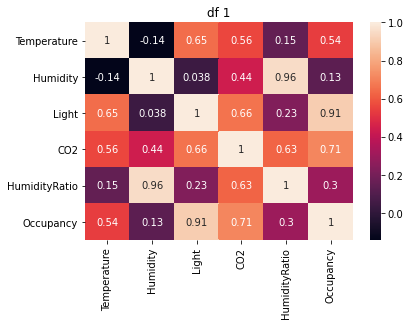

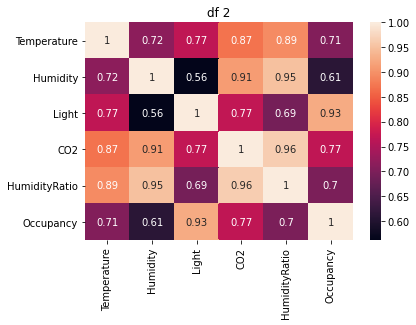

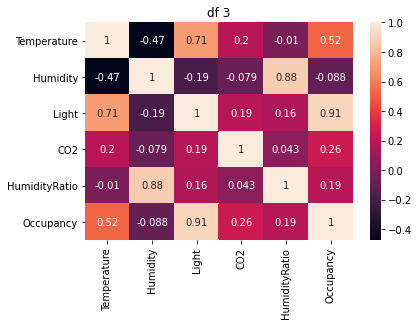

In [18]:
corrMatrix1 = df1.corr()
corrMatrix2 = df2.corr()
corrMatrix3 = df3.corr()
sns.heatmap(corrMatrix1, annot=True)
plt.title("df 1")
plt.show()
sns.heatmap(corrMatrix2, annot=True)
plt.title("df 2")
plt.show()
sns.heatmap(corrMatrix3, annot=True)
plt.title("df 3")
plt.show()

#Dividing dataset

In [19]:
#For training dataset "training.txt"
X_train = df1.iloc[:,0:5]
Y_train = df1.iloc[:,5]
scalar = StandardScaler()
X_scaled_train=scalar.fit(X_train).transform(X_train)

In [20]:
#For testing dataset 1 "datatest.txt" 
X_test1 = df2.iloc[:,0:5]
Y_test1 = df2.iloc[:,5]
scalar = StandardScaler()
X_scaled_test1=scalar.fit(X_test1).transform(X_test1)

#For testing dataset 2 "datatest2.txt" 
X_test2 = df3.iloc[:,0:5]
Y_test2 = df3.iloc[:,5]
scalar = StandardScaler()
X_scaled_test2=scalar.fit(X_test2).transform(X_test2)

In [21]:
print(X_scaled_train.shape)
print(X_scaled_test1.shape)
print(X_scaled_test2.shape)

(8143, 5)
(2665, 5)
(9752, 5)


##Logistic Regression

In [22]:
#importing Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# we can also add penalty
solv = {"newton-cg", "lbfgs", "liblinear", "sag", "saga"} # It represents which algorithm to use in the optimization problem. 

for a in solv:
    LR = LogisticRegression(random_state=0, solver = a)
    print(LR)
    LR.fit(X_scaled_train, Y_train)
    Y_pred1 = LR.predict(X_scaled_test1)
    Y_pred2 = LR.predict(X_scaled_test2)
    print('Coefficients: \n', LR.coef_)

    # accuracy 
    print('Accuracy on Train : ', round(LR.score(X_scaled_train, Y_train)*100, 2))
    print('Accuracy on Test1 : ', round(LR.score(X_scaled_test1, Y_test1)*100, 2))
    print('Accuracy on Test2 : ', round(LR.score(X_scaled_test2, Y_test2)*100, 2))
    print("For Test1 dataset")
    # Confusion Matrix 
    result = confusion_matrix(Y_test1, Y_pred1)
    print("Confusion Matrix:")
    print(result)
    # Classification report
    result1 = classification_report(Y_test1, Y_pred1)
    print("\nClassification Report:")
    print(result1)
    # Accuracy score
    result2 = accuracy_score(Y_test1, Y_pred1)
    print("\nAccuracy:",result2)
    print("For Test2 dataset")
    # Confusion Matrix 
    result = confusion_matrix(Y_test2, Y_pred2)
    print("Confusion Matrix:")
    print(result)
    # Classification report
    result1 = classification_report(Y_test2, Y_pred2)
    print("\nClassification Report:")
    print (result1)
    # Accuracy score
    result2 = accuracy_score(Y_test2, Y_pred2)
    print("\nAccuracy:",result2)
    print('')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Coefficients: 
 [[-1.25448032  0.18764232  3.91326452  1.89570778 -0.389882  ]]
Accuracy on Train :  98.6
Accuracy on Test1 :  89.04
Accuracy on Test2 :  95.61
For Test1 dataset
Confusion Matrix:
[[1671   22]
 [ 270  702]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1693
           1       0.97      0.72      0.83       972

    accuracy                           0.89      2665
   macro avg       0.92      0.85      0.87      2665
weighted avg       0.90      0.89      0.89      2665


Accuracy: 0.8904315196998124
For Test2 dataset
Confusion Matrix:
[[7651   52]
 [ 376 1673]]

Classificat

In [23]:
solv = {"newton-cg", "lbfgs", "liblinear", "sag", "saga"} # It represents which algorithm to use in the optimization problem. 
A= []
for a in solv:
    C = []
    LR = LogisticRegression(random_state=0, solver = a)
    print(LR)
    LR.fit(X_scaled_train, Y_train)
    Y_pred1 = LR.predict(X_scaled_test1)
    Y_pred2 = LR.predict(X_scaled_test2)
    # accuracy 
    C.append(a)
    C.append(round(LR.score(X_scaled_train, Y_train)*100, 2))
    C.append(round(LR.score(X_scaled_test1, Y_test1)*100, 2))
    C.append(round(LR.score(X_scaled_test2, Y_test2)*100, 2))

    A.append(C)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, clas

In [24]:
A

[['sag', 98.6, 89.04, 95.61],
 ['saga', 98.6, 89.04, 95.63],
 ['newton-cg', 98.6, 89.04, 95.61],
 ['lbfgs', 98.6, 89.04, 95.61],
 ['liblinear', 98.6, 89.23, 95.65]]

In [25]:
k = A[0]

k[0] = "Logistic Regression"

In [26]:
d = pd.DataFrame(A,columns =['Solver','Train','Test1','Test2'])

In [27]:
d.set_index('Solver')

,Train,Test1,Test2
Solver,,,
Logistic Regression,98.6,89.04,95.61
saga,98.6,89.04,95.63
newton-cg,98.6,89.04,95.61
lbfgs,98.6,89.04,95.61
liblinear,98.6,89.23,95.65


In [28]:
F = []
F.append(k)

In [29]:
F

[['Logistic Regression', 98.6, 89.04, 95.61]]

#Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
# GNB Classifier
GNB = GaussianNB()
g = ['GaussianNB']
# training
GNB.fit(X_scaled_train, Y_train)

# predictions
Y_pred1 = GNB.predict(X_scaled_test1)
Y_pred2 = GNB.predict(X_scaled_test2)
# accuracy
a = round(GNB.score(X_scaled_train,Y_train)*100,2)
acc1 = round(GNB.score(X_scaled_test1, Y_test1)*100, 2)
acc2 = round(GNB.score(X_scaled_test2, Y_test2)*100, 2)
g.append(a)
g.append(acc1)
g.append(acc2)

print(a)
print(acc1)
print(acc2)

97.89
90.39
99.15


In [31]:
F.append(g)

In [32]:
F

[['Logistic Regression', 98.6, 89.04, 95.61],
 ['GaussianNB', 97.89, 90.39, 99.15]]

In [33]:
# Confusion Matrix 
result = confusion_matrix(Y_test1, Y_pred1)
print("Confusion Matrix:")
print(result)
# Classification report
result1 = classification_report(Y_test1, Y_pred1)
print("\nClassification Report:")
print (result1)
# Accuracy score
result2 = accuracy_score(Y_test1, Y_pred1)
print("\nAccuracy:",result2)

# Confusion Matrix 
result = confusion_matrix(Y_test2, Y_pred2)
print("Confusion Matrix:")
print(result)
# Classification report
result1 = classification_report(Y_test2, Y_pred2)
print("\nClassification Report:")
print (result1)
 # Accuracy score
result2 = accuracy_score(Y_test2, Y_pred2)
print("\nAccuracy:",result2)

Confusion Matrix:
[[1682   11]
 [ 245  727]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1693
           1       0.99      0.75      0.85       972

    accuracy                           0.90      2665
   macro avg       0.93      0.87      0.89      2665
weighted avg       0.91      0.90      0.90      2665


Accuracy: 0.9039399624765478
Confusion Matrix:
[[7635   68]
 [  15 2034]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752


Accuracy: 0.9914889253486464


# K  nearest neighbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knnr = KNeighborsClassifier(n_neighbors = 5, weights='uniform')                     
knnr.fit(X_scaled_train, Y_train)
a = ['KNeighborsClassifier']
# accuracy 
a.append(round(knnr.score(X_scaled_train, Y_train)*100, 2))
a.append(round(knnr.score(X_scaled_test1, Y_test1)*100, 2))
a.append(round(knnr.score(X_scaled_test2, Y_test2)*100, 2))


print('Accuracy on Train : ', round(knnr.score(X_scaled_train, Y_train)*100, 2))
print('Accuracy on Test1 : ', round(knnr.score(X_scaled_test1, Y_test1)*100, 2))
print('Accuracy on Test2 : ', round(knnr.score(X_scaled_test2, Y_test2)*100, 2))

Accuracy on Train :  99.58
Accuracy on Test1 :  96.06
Accuracy on Test2 :  96.67


In [35]:
F.append(a)

In [36]:
F

[['Logistic Regression', 98.6, 89.04, 95.61],
 ['GaussianNB', 97.89, 90.39, 99.15],
 ['KNeighborsClassifier', 99.58, 96.06, 96.67]]

In [37]:
# predictions
Y_pred1 = knnr.predict(X_scaled_test1)
Y_pred2 = knnr.predict(X_scaled_test2)
# Confusion Matrix 
result = confusion_matrix(Y_test1, Y_pred1)

print("Confusion Matrix:")
print(result)
# Classification report
result1 = classification_report(Y_test1, Y_pred1)
print("\nClassification Report:")
print (result1)
# Accuracy score
result2 = accuracy_score(Y_test1, Y_pred1)
print("\nAccuracy:",result2)

# Confusion Matrix 
result = confusion_matrix(Y_test2, Y_pred2)
print("Confusion Matrix:")
print(result)
# Classification report
result1 = classification_report(Y_test2, Y_pred2)
print("\nClassification Report:")
print (result1)
 # Accuracy score
result2 = accuracy_score(Y_test2, Y_pred2)
print("\nAccuracy:",result2)


Confusion Matrix:
[[1648   45]
 [  60  912]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1693
           1       0.95      0.94      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Accuracy: 0.9606003752345216
Confusion Matrix:
[[7568  135]
 [ 190 1859]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7703
           1       0.93      0.91      0.92      2049

    accuracy                           0.97      9752
   macro avg       0.95      0.94      0.95      9752
weighted avg       0.97      0.97      0.97      9752


Accuracy: 0.9666735028712059



#Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
# classifier
RF = RandomForestClassifier(n_estimators = 50)
a =['RandomForestClassifier']
# training
RF.fit(X_scaled_train, Y_train)
# accuracy 
a.append(round(RF.score(X_scaled_train, Y_train)*100, 2))
a.append(round(RF.score(X_scaled_test1, Y_test1)*100, 2))
a.append(round(RF.score(X_scaled_test2, Y_test2)*100, 2))



print('Accuracy on Train : ', round(RF.score(X_scaled_train, Y_train)*100, 2))
print('Accuracy on Test1 : ', round(RF.score(X_scaled_test1, Y_test1)*100, 2))
print('Accuracy on Test2 : ', round(RF.score(X_scaled_test2, Y_test2)*100, 2))

# predictions
Y_pred1 = RF.predict(X_scaled_test1)
Y_pred2 = RF.predict(X_scaled_test2)

# Confusion Matrix 
result = confusion_matrix(Y_test1, Y_pred1)
print("Confusion Matrix:")
print(result)
# Classification report
result1 = classification_report(Y_test1, Y_pred1)
print("\nClassification Report:")
print (result1)
# Accuracy score
result2 = accuracy_score(Y_test1, Y_pred1)
print("\nAccuracy:",result2)

# Confusion Matrix 
result = confusion_matrix(Y_test2, Y_pred2)
print("Confusion Matrix:")
print(result)
# Classification report
result1 = classification_report(Y_test2, Y_pred2)
print("\nClassification Report:")
print (result1)
 # Accuracy score
result2 = accuracy_score(Y_test2, Y_pred2)
print("\nAccuracy:",result2)



Accuracy on Train :  100.0
Accuracy on Test1 :  92.35
Accuracy on Test2 :  94.84
Confusion Matrix:
[[1656   37]
 [ 167  805]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1693
           1       0.96      0.83      0.89       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665


Accuracy: 0.9234521575984991
Confusion Matrix:
[[7671   32]
 [ 471 1578]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7703
           1       0.98      0.77      0.86      2049

    accuracy                           0.95      9752
   macro avg       0.96      0.88      0.92      9752
weighted avg       0.95      0.95      0.95      9752


Accuracy: 0.9484208367514356


In [39]:
F.append(a)
F

[['Logistic Regression', 98.6, 89.04, 95.61],
 ['GaussianNB', 97.89, 90.39, 99.15],
 ['KNeighborsClassifier', 99.58, 96.06, 96.67],
 ['RandomForestClassifier', 100.0, 92.35, 94.84]]

#Support Vector Machine

In [40]:
from sklearn.svm import SVC
l = []
kernels ={ "rbf","linear"}
for k in kernels:
    sv=[]
    sv.append(k)
    print(k)
    print()
    sv.append
    svm = SVC(kernel = k,gamma = 'scale')
    svm.fit(X_scaled_train, Y_train)
    Y_pred1 = svm.predict(X_scaled_test1)
    Y_pred2 = svm.predict(X_scaled_test2)
    print('Accuracy on Train : ', round(svm.score(X_scaled_train, Y_train)*100, 2))
    print('Accuracy on Test1 : ', round(svm.score(X_scaled_test1, Y_test1)*100, 2))
    print('Accuracy on Test2 : ', round(svm.score(X_scaled_test2, Y_test2)*100, 2))
    sv.append(round(svm.score(X_scaled_train, Y_train)*100, 2))
    sv.append(round(svm.score(X_scaled_test1, Y_test1)*100, 2))
    sv.append(round(svm.score(X_scaled_test2, Y_test2)*100, 2))


    # accuracy 
   
       # Confusion Matrix 
    result = confusion_matrix(Y_test1, Y_pred1)
    print("Confusion Matrix:")
    print(result)
    # Classification report
    result1 = classification_report(Y_test1, Y_pred1)
    print("\nClassification Report:")
    print(result1)
    # Accuracy score
    result2 = accuracy_score(Y_test1, Y_pred1)
    print("\nAccuracy:",result2)
    #   Confusion Matrix 
    result = confusion_matrix(Y_test2, Y_pred2)
    print("Confusion Matrix:")
    print(result)
    # Classification report
    result1 = classification_report(Y_test2, Y_pred2)
    print("\nClassification Report:")
    print (result1)
     # Accuracy score
    result2 = accuracy_score(Y_test2, Y_pred2)
    print("\nAccuracy:",result2)
    print()
    l.append(sv)

rbf

Accuracy on Train :  98.88
Accuracy on Test1 :  97.79
Accuracy on Test2 :  97.87
Confusion Matrix:
[[1638   55]
 [   4  968]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Accuracy: 0.9778611632270169
Confusion Matrix:
[[7640   63]
 [ 145 1904]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7703
           1       0.97      0.93      0.95      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.96      0.97      9752
weighted avg       0.98      0.98      0.98      9752


Accuracy: 0.9786710418375718

linear

Accuracy on Train :  98.62
Accuracy on Test1 :  91.74

In [41]:
c =l[1]
c[0] = 'SVM'

In [42]:
 svq= pd.DataFrame(l,columns =['Solver','Train','Test1','Test2'])

In [43]:
svq

,Solver,Train,Test1,Test2
0,rbf,98.88,97.79,97.87
1,SVM,98.62,91.74,99.24


In [44]:
F.append(c)

In [45]:
F

[['Logistic Regression', 98.6, 89.04, 95.61],
 ['GaussianNB', 97.89, 90.39, 99.15],
 ['KNeighborsClassifier', 99.58, 96.06, 96.67],
 ['RandomForestClassifier', 100.0, 92.35, 94.84],
 ['SVM', 98.62, 91.74, 99.24]]

#ANNs

In [46]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()
model.add(Dense(128, input_dim =5, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #binary_crossentropy is used for binary classification
history = model.fit(X_scaled_train,Y_train,epochs=20,verbose=True, validation_split=.1)
model.summary()

Epoch 1/20
229/229 [==============================] - 2s 4ms/step - loss: 0.2455 - accuracy: 0.9502 - val_loss: 0.0931 - val_accuracy: 0.9387
Epoch 2/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9865 - val_loss: 0.1616 - val_accuracy: 0.9337
Epoch 3/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.1532 - val_accuracy: 0.9350
Epoch 4/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9888 - val_loss: 0.2287 - val_accuracy: 0.9337
Epoch 5/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9841 - val_loss: 0.2494 - val_accuracy: 0.9337
Epoch 6/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.2581 - val_accuracy: 0.9337
Epoch 7/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.2379 - val_accuracy: 0.9337
Epoch 

In [49]:
y_pred1 = model.predict(X_scaled_test1)
y_pred2 = model.predict(X_scaled_test2)
p = []
u = ['Loss']
w=['Accuracy']

In [50]:
loss, accuracy  = model.evaluate(X_scaled_train, 
                            Y_train, verbose=True)
u.append(round(loss,3))

255/255 [==============================] - 0s 962us/step - loss: 0.0482 - accuracy: 0.9862


In [51]:
w.append(round(accuracy*100,2))

In [52]:
loss1, accuracy1  = model.evaluate(X_scaled_test1, 
                            Y_test1, verbose=True)
loss1  , accuracy1

84/84 [==============================] - 0s 981us/step - loss: 0.2271 - accuracy: 0.8998


(0.22708088159561157, 0.8998124003410339)

In [53]:
loss2, accuracy2  = model.evaluate(X_scaled_test2, 
                            Y_test2, verbose=True)
loss2  , accuracy2

305/305 [==============================] - 0s 964us/step - loss: 0.1621 - accuracy: 0.9328


(0.1620727926492691, 0.932834267616272)

In [54]:
w.append(round(accuracy1*100,2))
w.append(round(accuracy2*100,2))

In [55]:
u.append(round(loss1,3))
u.append(round(loss2,3))

In [56]:
w

['Accuracy', 98.62, 89.98, 93.28]

In [57]:
u

['Loss', 0.048, 0.227, 0.162]

In [58]:
p.append(w)
p.append(u)

In [59]:
p

[['Accuracy', 98.62, 89.98, 93.28], ['Loss', 0.048, 0.227, 0.162]]

In [60]:
P = pd.DataFrame(p , columns =['','Train','Test1','Test2'])
P


,,Train,Test1,Test2
0,Accuracy,98.620,89.980,93.280
1,Loss,0.048,0.227,0.162


In [61]:
F

[['Logistic Regression', 98.6, 89.04, 95.61],
 ['GaussianNB', 97.89, 90.39, 99.15],
 ['KNeighborsClassifier', 99.58, 96.06, 96.67],
 ['RandomForestClassifier', 100.0, 92.35, 94.84],
 ['SVM', 98.62, 91.74, 99.24]]

In [ ]:
w[0] = 'ANN'
w

['ANN', 98.58, 96.51, 97.26]

In [ ]:
F.remove(w)
F

[['Logistic Regression', 98.6, 89.23, 95.65],
 ['GaussianNB', 97.89, 90.39, 99.15],
 ['KNeighborsClassifier', 99.58, 96.06, 96.67],
 ['RandomForestClassifier', 100.0, 92.72, 96.32],
 ['SVM', 98.88, 97.79, 97.87],
 ['ANN', 98.58, 96.51, 97.26]]

In [ ]:
DF = pd.DataFrame(F , columns =['Algorithm','Train','Test1','Test2'])

In [ ]:
DF

,Algorithm,Train,Test1,Test2
0,Logistic Regression,98.60,89.23,95.65
1,GaussianNB,97.89,90.39,99.15
2,KNeighborsClassifier,99.58,96.06,96.67
3,RandomForestClassifier,100.00,92.72,96.32
4,SVM,98.88,97.79,97.87
5,ANN,98.58,96.51,97.26


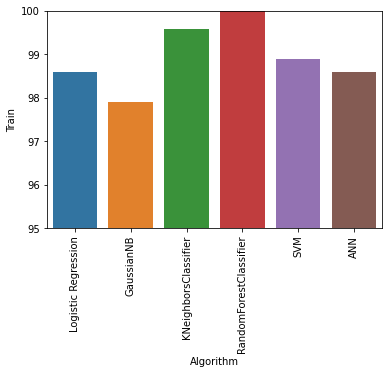

In [ ]:
aplot = sns.barplot(x="Algorithm", y = "Train", data = DF )
plt.xticks(rotation = 90)
aplot.set_ylim(95, 100)
plt.show()

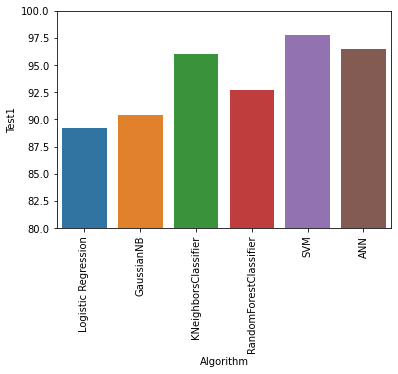

In [ ]:
aplot = sns.barplot(x="Algorithm", y = "Test1", data = DF  )
plt.xticks(rotation = 90)
aplot.set_ylim(80, 100)
plt.show()

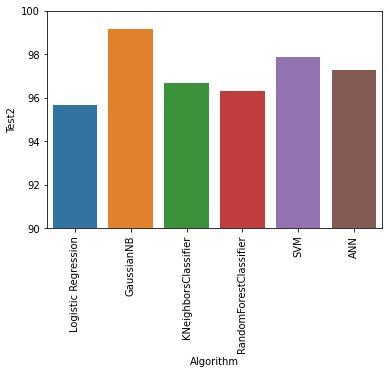

In [ ]:
aplot = sns.barplot(x="Algorithm", y = "Test2", data = DF  )
plt.xticks(rotation = 90)
aplot.set_ylim(90, 100)
plt.show()